# ASSIGNMENT-LINEAR REGRESSION

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    -Which variables are significant in predicting the price of a car
    -How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

In [1]:
#importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import sklearn
# module for performing test train split
from sklearn.model_selection import train_test_split

# Module for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# statmodel linear regression
import statsmodels.api as sm 

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor



import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the data.
car=pd.read_csv(r'..\CarPrice_Assignment.csv')

In [3]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#basic sanity check on the data 
car.shape
#205 rows 
#26 columns

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
#summary of the data:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### EXPLORATORY DATA ANALYSIS:

In [7]:
#checking for missing values:
round(car.isnull().sum()/len(car.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

#### There are no missing values as per the sanity check. Hence we can proceed further.

In [8]:
#checking for Duplicates in the data.
car.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

#### Hence, there is no duplicate data found.

In [9]:
#EXTRACTING THE COMPANY NAME FROM THE CARNAME COLUMN.
CompanyName = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"CompanyName",CompanyName) #INSERING THE COMPANY NAME COLUMN AT INDEX 2
car.head()


,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#DROPPING THE CARNAME COLUMN:
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
#UNIQUE COMPANY NAMES FROM THE COMPANY-NAME COLUMN:
car['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
#NUMBER OF COMPANIES:
car['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
vokswagen       1
porcshce        1
Nissan          1
mercury         1
toyouta         1
Name: CompanyName, dtype: int64

### From the above analysis, we can see there are spelling mistakes in the Company Names of the Cars. We need to handle this.
1. 'maxda' and  'mazda
2. 'Nissan' and  'nissan'
3. 'porsche' and 'porcshce'
4. 'toyota' and 'toyouta'
5. 'vokswagen' and 'volkswagen' and 'vw'

In [13]:
# converting all the values of Company Name to lower case.
car['CompanyName']=car['CompanyName'].str.lower()

### Handling the spelling mistakes.


In [14]:
#replacing the company names with correct spelling.
car['CompanyName'].replace('maxda','mazda',inplace=True)
car['CompanyName'].replace('porcshce','porsche',inplace=True)
car['CompanyName'].replace('toyouta','toyota',inplace=True)
car['CompanyName'].replace('vokswagen','volkswagen',inplace=True)
car['CompanyName'].replace('vw','volkswagen',inplace=True)

In [15]:
car['CompanyName'].unique() #CHECKING THE UNIQUE COMPANY NAMES AGAIN.

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
car['CompanyName'].value_counts() # CHECKING THE NUMBER OF COMPANIES.

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [17]:
car.columns # ALL THE COLUMNS OF CAR DATA SET.

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

###  VISUALIZATION OF THE DATA:

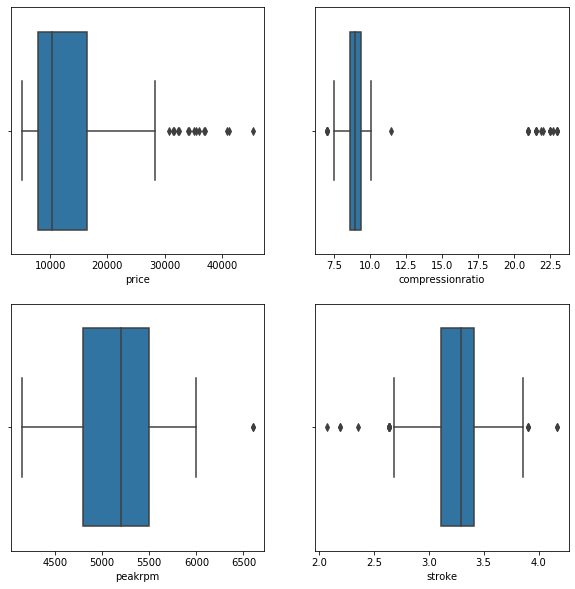

In [18]:
#CHECK FOR OUTLIERS:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1) # SUBPLOT
sns.boxplot(car['price']) # BOX PLOT FOR OUTLIER DETECTION.

plt.subplot(2,2,2)
sns.boxplot(car['compressionratio'])

plt.subplot(2,2,3)
sns.boxplot(car['peakrpm'])

plt.subplot(2,2,4)
sns.boxplot(car['stroke'])

plt.show()



In [19]:
#BASIC SUMMARY FOR THE PRICE OF THE CARS 
car['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

### Inference:
    - There are some outliers present in the 'price' and 'compressionratio' columns.
    - The mean and median for 'price' is different.
    - The max price is 45400
    - About 75% of the prices are below 16503 
    

Text(0.5, 1.0, 'DISTRIBUTION OF PRICE')

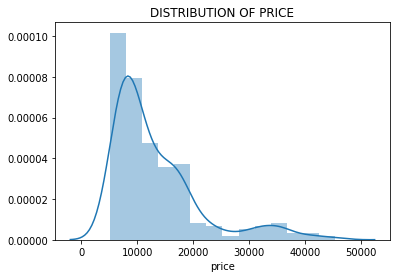

In [20]:
sns.distplot(car['price'])
plt.title('DISTRIBUTION OF PRICE')

### Inference:
    - The graph is not normally distributed. 
    - The mean is not centered at zero.
    - Most of the prices in the data are low. (below 15000)
    

In [21]:
#SORTING THE CATEGORICAL AND NUMERICAL COLUMNS.
car.nunique().sort_values()

enginelocation        2
fueltype              2
aspiration            2
doornumber            2
drivewheel            3
carbody               5
symboling             6
enginetype            7
cylindernumber        7
fuelsystem            8
CompanyName          22
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
curbweight          171
price               189
car_ID              205
dtype: int64

### UNIVARIATE ANALYSIS:

[Text(0, 0, 'alfa-romero'),
 Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'isuzu'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'buick'),
 Text(0, 0, 'mercury'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugeot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'renault'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

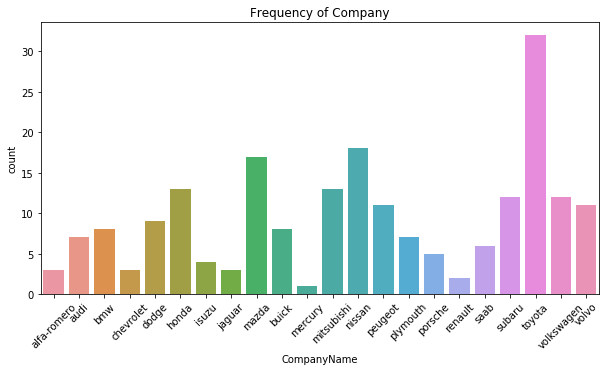

In [22]:
#plotting a countplot for Companies:

plt.figure(figsize=(10,5))
chart=sns.countplot(x='CompanyName',data=car) #COUNTPLOT
plt.title('Frequency of Company')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

Text(0.5, 1.0, 'Type of Engine')

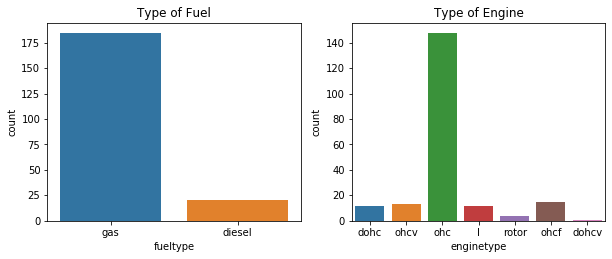

In [23]:
#plot for fuel type and engine type.

plt.figure(figsize=(10,8))
plt.subplot(2,2,1) # SUBPLOT
chart=sns.countplot(x='fueltype',data=car) #COUNTPLOT
plt.title('Type of Fuel')
plt.subplot(2,2,2)
chart=sns.countplot(x='enginetype',data=car)
plt.title('Type of Engine')

### Inference:
    - Toyota is the most favored company.
    - Ohc  is the preferd engine type.
    - Most of the cars uses 'gas' as the fuel.

### BIVARIATE ANALYSIS:

Text(0.5, 1.0, 'Company Name vs Price')

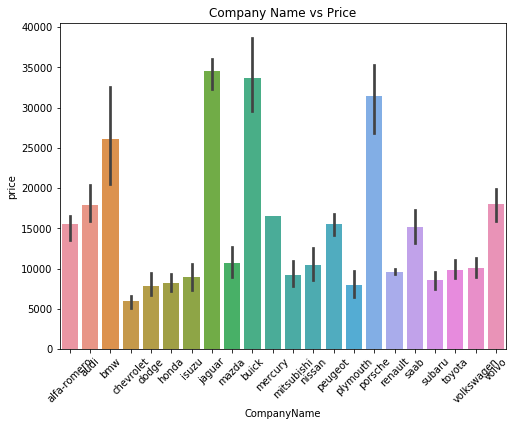

In [24]:
#Plotting the Companies against the Prices

plt.figure(figsize=(8,6))
chart=sns.barplot(x='CompanyName', y='price', data=car) #BARPLOT
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title('Company Name vs Price')

### Inference:
    -Jaguar has the highest price of all the car companies.
    -Chevrolet has the least price.

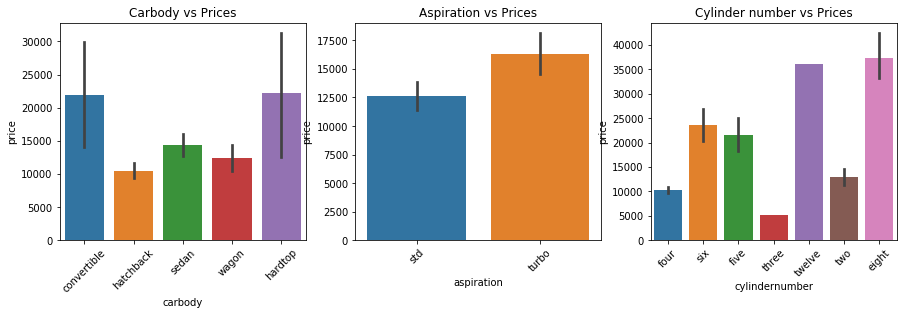

In [25]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1) #SUBPLOT
chart=sns.barplot(x='carbody', y='price', data=car)  #BARPLOT
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title('Carbody vs Prices')

plt.subplot(1,3,2)
chart=sns.barplot(x='aspiration', y='price', data=car)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title('Aspiration vs Prices')

plt.subplot(1,3,3)
chart=sns.barplot(x='cylindernumber', y='price', data=car)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title('Cylinder number vs Prices')

plt.show()

### Inference:
    - Convertible and hardtop has the highest prices. 
    - Turbo aspiration has the highest prices.
    - Most common number of cylinders are four, six and five. Eight cylinders have the highest price range.

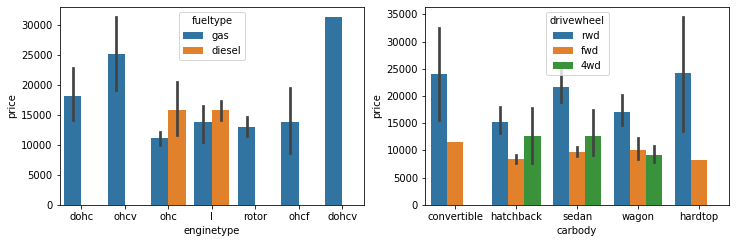

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(x='enginetype', y='price', hue = 'fueltype', data=car)


plt.subplot(2,2,2)
sns.barplot(x='carbody', y='price', hue = 'drivewheel', data=car)
plt.show()

Text(0.5, 0, 'Car Height')

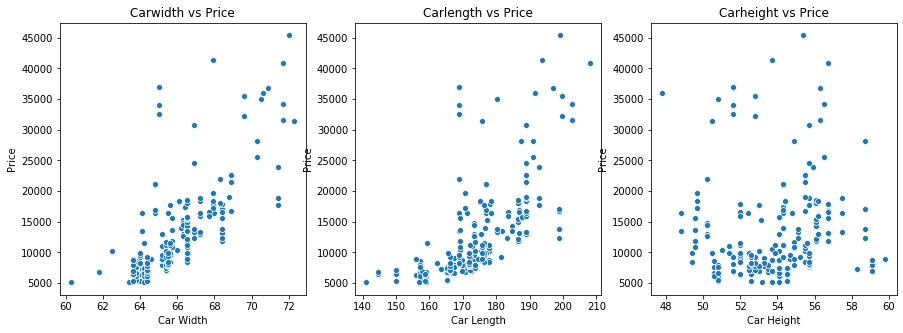

In [27]:
#PLOTTING THE NUMERIC DATA USING SCATTER PLOTS:

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x=car['carwidth'],y=car['price'])
plt.title('Carwidth vs Price')
plt.ylabel('Price')
plt.xlabel('Car Width')

plt.subplot(1,3,2)
sns.scatterplot(x=car['carlength'],y=car['price'])
plt.title('Carlength vs Price')
plt.ylabel('Price')
plt.xlabel('Car Length')

plt.subplot(1,3,3)
sns.scatterplot(x=car['carheight'],y=car['price'])
plt.title('Carheight vs Price')
plt.ylabel('Price')
plt.xlabel('Car Height')


    

### Inference:
    - Car width, Car length and Car height has positive correlation.
    - Car width and Car length shows some patterns.

Text(0.5, 0, 'highwaympg')

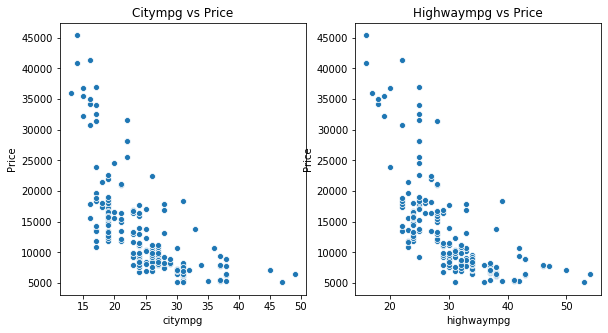

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x=car['citympg'],y=car['price'])
plt.title('Citympg vs Price')
plt.ylabel('Price')
plt.xlabel('citympg')

plt.subplot(1,3,2)
sns.scatterplot(x=car['highwaympg'],y=car['price'])
plt.title('Highwaympg vs Price')
plt.ylabel('Price')
plt.xlabel('highwaympg')

### Infernce:
    - Citympg and Highwaympg has a negative correlation with the prices.
    

Text(0.5, 1, 'Correlation data')

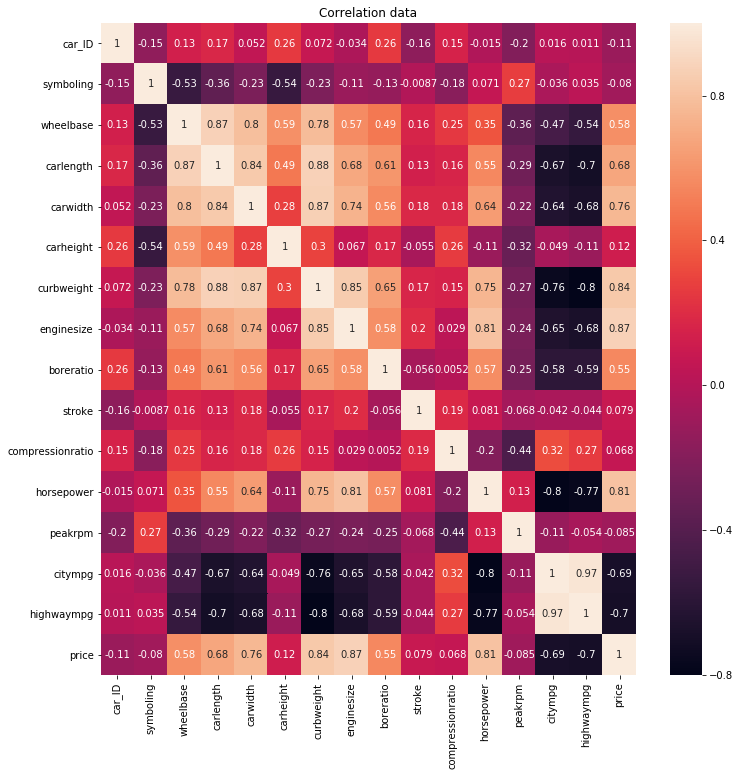

In [29]:
#Correlation of all the Numeric Variables:
plt.figure(figsize=(12,12))

num_var = list(car.columns[car.dtypes != 'object'])

ax = sns.heatmap(car[num_var].corr(),annot=True)

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation data')

### Inference:
    - Carlength, curbweight, enginesize, carwidth are highly correlated with price of the cars.

### DATA PREPARATION:

#### BINNING

In [30]:
#BINNING THE SYMBOLING COLUMN:

bins = [-3, -1, 1, 3]
labels = ["safe","moderate","risk"]
car['symboling'] = pd.cut(car['symboling'], bins=bins, labels=labels)

In [31]:
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,risk,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,risk,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,moderate,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,risk,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,risk,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### DUMMY VARIABLES:

In [32]:
#### DUMMY VARIABLES:

drivewheel_D = pd.get_dummies(car['drivewheel'], prefix = 'drivewheel', drop_first = True)

carbody_D = pd.get_dummies(car['carbody'], prefix = 'carbody',drop_first = True)

symboling_D = pd.get_dummies(car['symboling'], prefix = 'symb' ,drop_first = True)

enginetype_D = pd.get_dummies(car['enginetype'], prefix = 'engtyp', drop_first = True)

cylindernumber_D = pd.get_dummies(car['cylindernumber'], prefix = 'cyn', drop_first = True)

fuelsystem_D = pd.get_dummies(car['fuelsystem'], prefix = 'fuelsys', drop_first = True)

CompanyName_D = pd.get_dummies(car['CompanyName'], drop_first = True)

fueltype_D = pd.get_dummies(car['fueltype'], prefix = 'fueltyp', drop_first = True)

aspiration_D = pd.get_dummies(car['aspiration'] , prefix = 'asp', drop_first = True)

doornumber_D = pd.get_dummies(car['doornumber'], prefix = 'doornum', drop_first = True)

enginelocation_D = pd.get_dummies(car['enginelocation'], prefix = 'engloc', drop_first = True)

In [33]:
#CONCAT THE DUMMY DATAFRAMES WITH THE CAR DATA SET:

car=pd.concat([car,drivewheel_D,carbody_D,symboling_D,enginetype_D,cylindernumber_D,fuelsystem_D,CompanyName_D,fueltype_D,aspiration_D,doornumber_D,enginelocation_D],axis=1)

In [34]:
#DROPPING THE ORIGINAL COLUMNS:

car = car.drop('drivewheel',axis=1)
car = car.drop('carbody',axis=1)
car = car.drop('symboling',axis=1)
car = car.drop('enginetype',axis=1)
car = car.drop('cylindernumber',axis=1)
car = car.drop('fuelsystem',axis=1)
car = car.drop('car_ID',axis=1)
car = car.drop('CompanyName',axis=1)
car = car.drop('fueltype',axis=1)
car = car.drop('aspiration',axis=1)
car = car.drop('doornumber',axis=1)
car = car.drop('enginelocation',axis=1)



In [35]:
car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,symb_moderate,symb_risk,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cyn_five,cyn_four,cyn_six,cyn_three,cyn_twelve,cyn_two,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,fueltyp_gas,asp_turbo,doornum_two,engloc_rear
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [36]:
#CHECK THE ROWS AND COLUMNS OF THE DATA SET:
car.shape

(205, 66)

#### SPLITTING THE CAR DATA INTO TRAIN-SET AND TEST-SET

In [37]:
#SPLIITING THE DATA INTO DF_TRAIN AND DF_TEST WITH RATIO 80:20:

df_train, df_test = train_test_split(car, train_size = 0.8, random_state = 100)

In [38]:
#ROWS AND COLUMNS OF TRAIN SET:

df_train.shape

(164, 66)

In [39]:
#ROWS AND COLUMNS OF TEST SET:

df_test.shape

(41, 66)

#### RESCALING

In [40]:
#INSTANTIATING AN OBJECT OG CLASS MINMAXSCALER:

scaler = MinMaxScaler()

#CREATING A LIST OF NUMERIC VARIABLES:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize','compressionratio', 'boreratio', 'stroke','horsepower','peakrpm','citympg','highwaympg','price']

#SCALING THE NUMERIC DATA :

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
#CHECK IF THE MAX VALUE IS 1 AND MIN VALUE IS 0:

df_train[num_vars].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,compressionratio,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.404605,0.519899,0.454726,0.482927,0.398579,0.236493,0.202866,0.489983,0.542159,0.221037,0.400448,0.352642,0.385794,0.211153
std,0.197731,0.197651,0.179980,0.205820,0.202330,0.148945,0.255795,0.203913,0.153546,0.164011,0.192302,0.185496,0.188116,0.212491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.409756,0.308333,0.341667,0.247673,0.135849,0.098437,0.293651,0.464646,0.090625,0.265306,0.194444,0.216216,0.070475
50%,0.341379,0.502439,0.425000,0.491667,0.347944,0.184906,0.125000,0.468254,0.555556,0.183333,0.428571,0.333333,0.378378,0.132856
75%,0.475862,0.615041,0.516667,0.641667,0.522789,0.287736,0.150000,0.682540,0.616162,0.283333,0.551020,0.500000,0.540541,0.295349
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


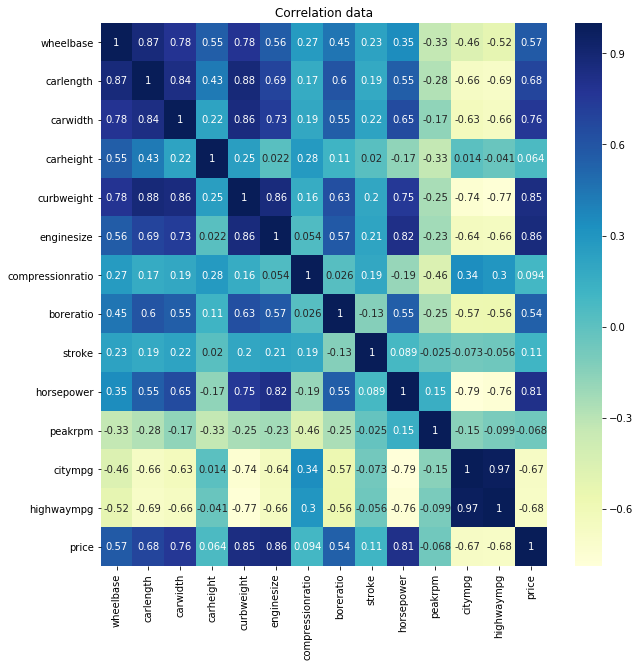

In [42]:
#PLOTTING THE CORRELATION OF ALL THE NUMERIC VARIABLES:

plt.figure(figsize = (10, 10))

ax = sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation data')
 
plt.show()

### Inference:
    - Curbweight, Enginesize,horsepower are highly correlated.

In [43]:
#DIVIDING THE DATA INTO X AND Y:
y_train = df_train.pop('price')
X_train = df_train

### MODEL BUILDING:
    Here, Mixed approach is used. ie RFE and selection based on p-value and VIF(VARIATION INFLATION FACTOR)
    RFE has taken 12 variables.

#### RFE (RECURSIVE ELIMINATION FEATURE)

In [44]:
#INSTANTIATING AN OBJECT OF LINEARREGRESSION CLASS:
lm = LinearRegression()

#FITTING THE MODEL:
lm.fit(X_train,y_train)

#ASSIGNING THE MODEL TO RFE 
rfe = RFE(lm, 12)

rfe = rfe.fit(X_train, y_train)

In [45]:
#LIST OF ALL THE VARIABLES ACCORDING TO THE RANKING.
#THE VARIABLES THAT ARE SELECTED THROUGH RFE ARE MARKED AS TRUE. 
#OTHER VARIABLES MARKED AS FALSE ARE SELECTED BASED ON THEIR RANKS.

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 20),
 ('carlength', False, 23),
 ('carwidth', True, 1),
 ('carheight', False, 19),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('horsepower', False, 37),
 ('peakrpm', False, 15),
 ('citympg', False, 48),
 ('highwaympg', False, 28),
 ('drivewheel_fwd', False, 49),
 ('drivewheel_rwd', False, 42),
 ('carbody_hardtop', False, 24),
 ('carbody_hatchback', False, 25),
 ('carbody_sedan', False, 27),
 ('carbody_wagon', False, 26),
 ('symb_moderate', False, 38),
 ('symb_risk', False, 39),
 ('engtyp_dohcv', False, 6),
 ('engtyp_l', False, 5),
 ('engtyp_ohc', False, 40),
 ('engtyp_ohcf', False, 16),
 ('engtyp_ohcv', False, 47),
 ('engtyp_rotor', True, 1),
 ('cyn_five', False, 3),
 ('cyn_four', False, 2),
 ('cyn_six', False, 7),
 ('cyn_three', True, 1),
 ('cyn_twelve', True, 1),
 ('cyn_two', True, 1),
 ('fuelsys_2bbl', False, 51),
 ('fuelsys_4bbl', False, 35),
 ('fuelsys_idi', False, 10),

In [46]:
#TAKING ONLY THE RFE.SUPPORT_ VARIABLES: 

col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'engtyp_rotor', 'cyn_three', 'cyn_twelve', 'cyn_two', 'bmw', 'porsche',
       'engloc_rear'],
      dtype='object')

In [47]:
#EXCLUDING THE VARIABLES THAT ARE NOT IN RFE.SUPPORT:

X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'symb_moderate', 'symb_risk', 'engtyp_dohcv',
       'engtyp_l', 'engtyp_ohc', 'engtyp_ohcf', 'engtyp_ohcv', 'cyn_five',
       'cyn_four', 'cyn_six', 'fuelsys_2bbl', 'fuelsys_4bbl', 'fuelsys_idi',
       'fuelsys_mfi', 'fuelsys_mpfi', 'fuelsys_spdi', 'fuelsys_spfi', 'audi',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'fueltyp_gas',
       'asp_turbo', 'doornum_two'],
      dtype='object')

#### BUILDING THE MODEL USING STATSMODEL:

In [48]:
#SELECTING THE VARIABLES FOR THE X_TRAIN DATA 
X_train_rfe=X_train[col]

### MODEL 1

In [49]:
#ADDING A CONSTANT:
X_train_rfe=sm.add_constant(X_train_rfe)

#FITTING THE MODEL:
lm=sm.OLS(y_train,X_train_rfe).fit()

#SUMMARY OF THE MODEL:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.16e-77
Time:                        16:12:54   Log-Likelihood:                 228.39
No. Observations:                 164   AIC:                            -432.8
Df Residuals:                     152   BIC:                            -395.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0946      0.026     -3.599   

#### NOTE: CYN_TWELVE HAS A HIGH P-VALUE , HENCING DROPPING THIS VARIABLE

In [50]:
X_train_new = X_train_rfe.drop(["cyn_twelve"], axis = 1)

### MODEL 2

In [51]:
X_train_new = sm.add_constant(X_train_new)
 
lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.07e-78
Time:                        16:12:54   Log-Likelihood:                 226.92
No. Observations:                 164   AIC:                            -431.8
Df Residuals:                     153   BIC:                            -397.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1066      0.025     -4.198   

#### CHECKING THE VIF 

In [52]:
#CREATING A NEW DATAFRAME FOR VIF
vif = pd.DataFrame()

#ADDING THE x_TRAIN COLUMNS TO FEATURES COLUMNS:
vif['Features'] = X_train_new.columns

#CALCULATING THE VIF AND ADDING IT INTO THE NEW 'VIF' COLUMN
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]

#ROUNDING OFF THE VALUES:
vif['VIF'] = round(vif['VIF'], 2)

#SORTING THE VARIABLES ACCORDING TO THE VIF VALUES:
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,engtyp_rotor,inf
8,cyn_two,inf
0,const,26.82
2,curbweight,8.47
3,enginesize,5.44
1,carwidth,4.40
10,porsche,2.36
11,engloc_rear,2.26
4,boreratio,2.10
5,stroke,1.25


#### NOTE: engtyp_rotor has high vif , hence dropping it.

In [53]:
X_train_new = X_train_new.drop(["engtyp_rotor"], axis = 1)

### MODEL 3

In [54]:
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.07e-78
Time:                        16:12:55   Log-Likelihood:                 226.92
No. Observations:                 164   AIC:                            -431.8
Df Residuals:                     153   BIC:                            -397.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1066      0.025     -4.198      

In [55]:
#CHECKING VIF:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.82
2,curbweight,8.47
3,enginesize,5.44
1,carwidth,4.40
9,porsche,2.36
10,engloc_rear,2.26
4,boreratio,2.10
5,stroke,1.25
7,cyn_two,1.17
8,bmw,1.10


#### NOTE: CURBWEIGHT HAS HIGH VIF , HENCE DROPPING IT.

In [56]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### MODEL 4

In [57]:
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.61e-74
Time:                        16:12:55   Log-Likelihood:                 215.56
No. Observations:                 164   AIC:                            -411.1
Df Residuals:                     154   BIC:                            -380.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1264      0.027     -4.721      

In [58]:
#CHECKING THE VIF VALUES AGAIN:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.11
2,enginesize,3.28
1,carwidth,2.80
9,engloc_rear,2.24
8,porsche,2.20
3,boreratio,1.93
4,stroke,1.25
6,cyn_two,1.13
7,bmw,1.10
5,cyn_three,1.05


#### NOTE: STROKE has high p-value which is insignificant, So we can drop this variable.

In [59]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)

### MODEL 5

In [60]:

X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.16e-74
Time:                        16:12:56   Log-Likelihood:                 212.95
No. Observations:                 164   AIC:                            -407.9
Df Residuals:                     155   BIC:                            -380.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1723      0.017     -9.941      

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.68
2,enginesize,3.08
1,carwidth,2.77
8,engloc_rear,2.23
7,porsche,2.20
3,boreratio,1.73
5,cyn_two,1.13
6,bmw,1.09
4,cyn_three,1.05


#### NOTE: BORERATIO has high p-value, hence dropping it.

In [62]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

### MODEL 6

In [63]:

X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     200.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.25e-74
Time:                        16:12:56   Log-Likelihood:                 210.68
No. Observations:                 164   AIC:                            -405.4
Df Residuals:                     156   BIC:                            -380.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1892      0.016    -12.196      

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.37
2,enginesize,2.87
1,carwidth,2.65
7,engloc_rear,2.23
6,porsche,2.10
4,cyn_two,1.11
5,bmw,1.09
3,cyn_three,1.04


#### NOTE: PORSCHE has high p-value ,hence dropping this variable.

In [65]:
X_train_new = X_train_new.drop(["porsche"], axis = 1)

### MODEL 7

In [66]:

X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     230.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.59e-75
Time:                        16:12:57   Log-Likelihood:                 209.07
No. Observations:                 164   AIC:                            -404.1
Df Residuals:                     157   BIC:                            -382.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1942      0.015    -12.654      

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.08
2,enginesize,2.87
1,carwidth,2.57
6,engloc_rear,1.15
4,cyn_two,1.11
5,bmw,1.09
3,cyn_three,1.04


#### NOTE: CYN_THREE variable has comparatively high p-value , hence we need to drop it.

In [68]:
X_train_new = X_train_new.drop(["cyn_three"], axis = 1)

### MODEL 8

In [69]:

X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     264.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.45e-75
Time:                        16:12:57   Log-Likelihood:                 205.20
No. Observations:                 164   AIC:                            -398.4
Df Residuals:                     158   BIC:                            -379.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1850      0.015    -12.100      

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.70
2,enginesize,2.86
1,carwidth,2.51
5,engloc_rear,1.15
3,cyn_two,1.11
4,bmw,1.09


### INFERENCE: All the independent variable have considerably low VIF (less than 5) and the Adj. R-Squared is 0.890 which is quite a significant fit. We will conclude with these variables as the final model predictor variables.

### The Final Predictor Variables are:
    1. Engine Size
    2. Car Width
    3. Engine Location: Rear
    4. Cylinder number two
    5. Comany Name: BMW 

### RESIDUAL ANALYSIS:

In [71]:
#PREDICTING THE VALUES:
y_train_pred = lm.predict(X_train_new)

Text(0.5, 1.0, 'Residual Analysis of Error Terms')

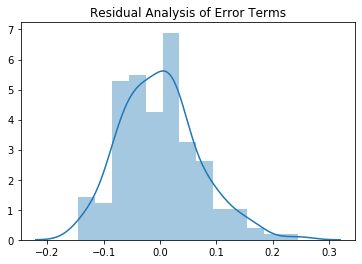

In [72]:
#CALCULATIONG THE ERROR TERMS:
res=y_train-y_train_pred
 
#PLOTTING A DISTPLOT FOR THE ERROR TERMS:
sns.distplot(res)
plt.title('Residual Analysis of Error Terms')

#### INFERENCE:
1. THE ERROR TERMS ARE  APPROXIMATELY NORMALLY DISTRIBUTED.
2. THE ERROR TERMS ARE CENTERED AT ZERO.

#### Although not the perfect normal distribution and centered not perfectly but almost around zero. There is some error variance along the tails . Considering the size of the train and test data this error term distribution still is almost close to a normal distribution.


### PREDICTIONS AND EVALUATION:


In [73]:
#CREATING A LIST OF NUMERIC VARIABLES OF TEST DATA:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize','compressionratio', 'boreratio', 'stroke','horsepower','peakrpm','citympg','highwaympg','price']

#SCALING THE TEST DATA:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [74]:
#DIVIDING THE DATA INTO X AND y:

y_test = df_test.pop('price')
X_test = df_test

In [75]:
#DROPPING THE CONSTANT FROM THE TRAIN DATA:
X_train_new= X_train_new.drop(['const'], axis=1)

#CREATING A TEST DATA FROM THE TRAIN DATA COLUMNS.
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
#PREDICTING THE Y VALUES :
y_test_pred = lm.predict(X_test_new)

#### CALCULATING THE R-SQUARED VALUE FOR TEST DATA

In [77]:
#CALCULATING THE R-SQUARED VALUE  OF THE TEST DATA:

#module for R-squared and Root Mean Square.
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

r2_test=r2_score(y_test, y_test_pred)

In [78]:
print('R-squared for test data:',r2_test)

R-squared for test data: 0.8904416184328342


In [79]:
#CALCULATING THE ROOT MEAN SQUARED VALUE:

mean_val=mean_squared_error(y_true=y_test,y_pred=y_test_pred)


In [80]:
print('Root Mean Square for test data:',mean_val)

Root Mean Square for test data: 0.006441838727607053


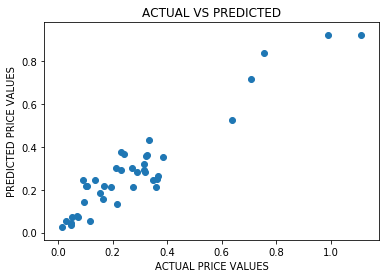

In [81]:
#evaluations:
plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel('ACTUAL PRICE VALUES')
plt.ylabel('PREDICTED PRICE VALUES')
plt.title('ACTUAL VS PREDICTED')
plt.show()

### INFERENCE:
1. R-squared value of test data: 0.890
2. Adjusted R-squared value of train data : 0.890
3. Therefore, almost 89% of variance is explained.
4. P-values for all the coefficients seem to be less than the significance level of 0.05.

r2_score on the test data(0.890) is equal to the trained Adj. R-Squared value (0.890) of the model. we have a significantly high r2_score and a low RMSE of 0.0064.

With Low VIF and Low P-values, we can conclude that these variables do describe the prices of the cars to a good extent.

THE FINAL EQUATION CAN BE :
#### price = (0.7272)*enginesize + (0.4510)*carwidth + (0.4835)*engloc_rear + (0.1688)*cyn_two + (0.2480)*bmw
This equation implies how the price of the vehical changes with a unit change in any of these independent variable with all other variables held constant.
1. We can say, the price of the car changes by 0.7272 for every unit change in the engine size if all other variables are held constant so is true for all other variables.
2. The cylinder number two is the most commonly available feature.
3. The company name is also essensial in determining the price the automobile.Here BMW adds upto the price of the car by 0.2480.
4. The width of the car is also a good predictor as it adds up to the price by a factor of 0.4510.
